# 2020AIML544 - UNSUPERVISED LEARNING - ASSIGNMENT1

## K MEANS CLUSTERING

## Overall Approach

### EDA TASKS PERFORMED:
    1. READ THE EXCEL FILE INTO A DATAFRAME  
    2. CHECK THE STATISTICS OF DATA USING DESCRIBE FUNCTION
    3. CHECK FOR DUPLICATE ROWS & NULL VALUES 
    4. LABEL ENCODER TO CONVERT CATEGORICAL ATTRIBUTES TO NUMERICAL
    5. NORMALIZATION OF ALL THE NUMERICAL ATTRIBUTES

### MODEL BUILDING:
    1. BUILD K MEANS ALGORITHM FROM SCRATCH FOR 2 ATTRIBUTES FOR K = 2
    2. REPEAT ABOVE STEP FOR K = 3,4,5
    3. USE THE K MEANS ALGORITHM CODE WRITTEN WITH ALL THE FEATURES IN THE DATASET FOR K = 5
    4. INTERPRET THE RESULTS USING ELBOW CURVE AND PARALLEL COORDINATES PLOT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import style
from functions import *

style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

### Read the input excel file into a dataframe

In [2]:
X=pd.read_csv("C:\\Users\Aspire V3-572\Downloads\KMeans2.csv", encoding='cp1252')

colors = 10*["r","b","c","g","y"]

#### Check the number of records in the dataset using shape function

In [3]:
X.shape

(603, 15)

#### Display information about the dataframe using head functio

In [4]:
X.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [5]:
X = X.drop(X.columns[[0]],axis = 1)
X.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


#### Check the statistics of attributes using describe function.

In [6]:
X.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


### Data Cleaning - Checking for duplicate rows

#### Observation: There are no Duplicate rows in our dataset

In [7]:
dv = X.duplicated(keep=False)
dv.sum()

0

### Missing Values Imputation 

#### Observation: There are no Null values in the data

In [8]:
X.isnull().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

### <span style='background : yellow' > Q-1: Given that K-means depends on distance metric, it is a convention to normalize the data attributes so that attributes are on the same scale. So, in this first task, normalize all data attributes   </span>

### Label Encoding & Normalization

#### (i)  Converting categorical to numerical encoding 
#### (ii) Normalizing the numerical features using StandardScaler

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i, val in enumerate(X.columns.values): 
     if (val == "title") or (val == "artist") or (val == "top genre") or (val == "year"):
        X[val] = le.fit_transform(X[val])
    
X.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,202,174,46,0,97,89,67,-4,8,80,217,19,4,83
1,298,49,27,0,87,93,75,-5,52,64,263,24,23,82
2,502,89,25,0,120,84,76,-3,29,71,200,10,14,80
3,41,94,25,0,119,92,70,-4,8,71,295,0,4,79
4,252,19,48,0,109,84,64,-5,9,43,221,2,4,78


In [10]:
X1 = X[['title', 'artist', 'top genre', 'year']]
X2 = X[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X2  = pd.DataFrame(scaler.fit_transform(X2),columns = X2.columns)
X2.head()

X_scaled = pd.concat([X1, X2], axis=1)
X_scaled.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,202,174,46,0,-0.869658,1.134915,0.196013,0.564715,-0.746617,1.234731,-0.225061,0.225231,-0.582886,1.136055
1,298,49,27,0,-1.273295,1.380356,0.794474,0.207023,2.614298,0.523441,1.123844,0.466207,1.958256,1.067116
2,502,89,25,0,0.058705,0.828112,0.869282,0.922407,0.857456,0.834630,-0.723569,-0.208526,0.754557,0.929239
3,41,94,25,0,0.018341,1.318996,0.420436,0.564715,-0.746617,0.834630,2.062212,-0.690479,-0.582886,0.860301
4,252,19,48,0,-0.385295,0.828112,-0.028410,0.207023,-0.670232,-0.410127,-0.107765,-0.594088,-0.582886,0.791363


In [11]:
X1_scaled=X_scaled[['bpm','dnce']]
print('X1_scaled',X1_scaled)

X1_array=X1_scaled.to_numpy()

X1_scaled           bpm      dnce
0   -0.869658  0.196013
1   -1.273295  0.794474
2    0.058705  0.869282
3    0.018341  0.420436
4   -0.385295 -0.028410
..        ...       ...
598 -0.587113 -0.252832
599 -0.950386  0.794474
600  0.704522 -0.851294
601 -0.183477 -0.327640
602  1.269613  0.420436

[603 rows x 2 columns]


### <span style='background : yellow' > **Q-2: Write your own code for the K-means algorithm using only two attributes, bpm and danceability. Take K=2. Plot clusters on a scatter plot with X and Y being the two attributes.**   </span>

In [12]:
class K_Means:
    def __init__(self, k, tol, max_iter, dist):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.dist = dist
    
    def fit(self,data):
        self.centroids = {}
        self.dist = 10
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                          
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
            if optimized:
                dist = 0
                for i in range(2):
                    size = len(self.classifications[i])
                    featureset1 = [None] * size
                    for j in range(size):
                        featureset1[j] = self.classifications[i][j]
                        dist = dist + (np.linalg.norm(featureset1[j] -self.centroids[i]))
                    self.dist = dist
                break
                
    def display(self):
        return self.dist
    
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [13]:
def clusterplot(k):
         
    for classification in clf.classifications:
        color = colors[classification]
        for featureset in clf.classifications[classification]:  
            plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

    for centroid in clf.centroids:
        plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker="o", color='black', s=150, linewidths=5)

    plt.show()

wcss 585.48807366042


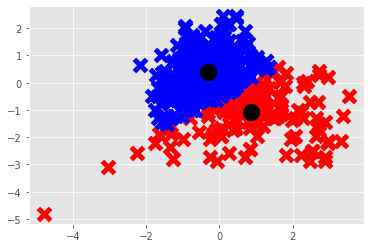

In [14]:
wcss=0
k=2
clf = K_Means(2,0.001,300,0)
clf.fit(X1_array)
print('wcss', clf.display())

clusterplot(k)

### <span style='background : yellow' > Observation </span>
    * K Means is a distance based algorithm, it calculates the sum of the square of the points and calculates the average distance. Since we have considered k = 2, all the datapoints closer to each centroid are forming a cluster. 
    
    * Also, we can see that there is an outlier in the dataset, K Means is sensitive to outliers and hence that is also considered in one of the cluster. The centroid of this cluster would be impacted by the outlier.
    
    * From the plot above, there are some datapoints in the red colored cluster which are not very cohesive so looks like k = 2 is not a good idea here. Also, intra cluster distance seems to be more in the red cluster compared to the blue cluster.

### <span style='background : yellow' >  Interpretation of data using Parallel Coordinates Plot   </span>

    * We can interpret from the below Parallel Coordinates Plots that high BPM & low Danceability form the 1st cluster 
    (depicted in blue color)
    
    * Similarly, low BPM & high Danceability form the 2nd cluster (depicted in orange color)

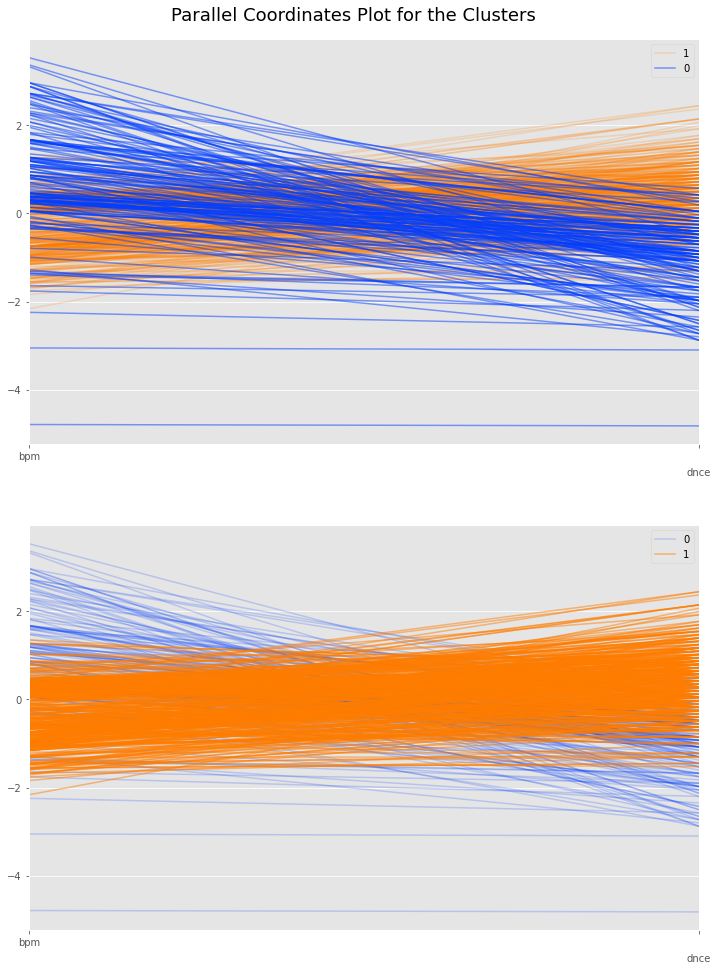

In [15]:
cluster = []
for featureset in X1_array:
    predict = clf.predict(featureset)
    cluster.append(predict)
    
# Add the cluster number to the original scaled data
X1_clustered = pd.DataFrame(X1_array, index=X1_scaled.index, columns=X1_scaled.columns)
X1_clustered["cluster"] = cluster

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X1_clustered, 2)

### <span style='background : yellow' > **Q-3: Redo question-2 on different values of K = 3,4,5. For each case, draw the plot of clusters as stated above**   </span>

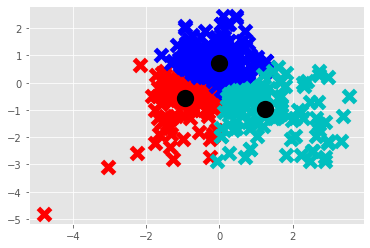

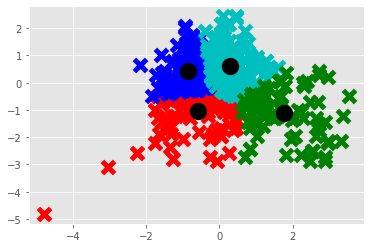

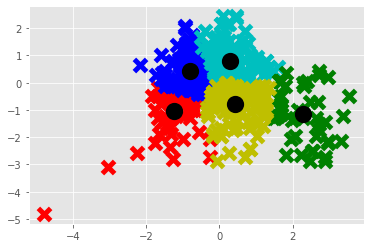

wcss [336.3307521635413, 201.71809982926936, 141.4968654104166]


In [16]:
wcss=[None] * 3
i = 0
for k in range (3,6):
    clf = K_Means(k,0.001,300,0)
    clf.fit(X1_array)
    wcss[i] = clf.display()
    i = i+1
    
    clusterplot(k)
    
print('wcss',wcss)

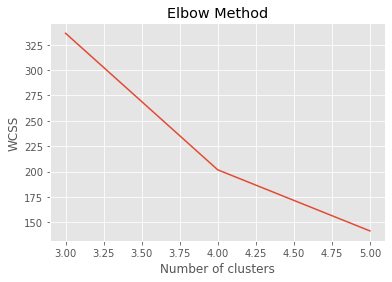

In [17]:
plt.plot(range(3, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### <span style='background : yellow' > Observation </span>
    * As the k value increases, the datapoints in each cluster seem to be more cohesive.
    
    * WCSS is the sum of squared distance between each point and the centroid in a cluster. 
      This value decreases as k value increases and moves to convergence. 
    
    * For our data, at k = 5, the WCSS seems to be minimum and is the better k.

### <span style='background : yellow' > **Q-4: Use the code written by you to cluster the data using all the features in the dataset. Take k=5 for this.**   </span>

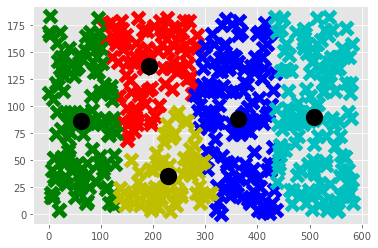

wcss 14375.052465245963


In [18]:
X_array = X_scaled.to_numpy()

wcss = [None]*5
k = 5
clf = K_Means(k,0.001,300,0)
clf.fit(X_array)

clusterplot(k)

wcss = clf.display()

print('wcss',wcss)

### <span style='background : yellow' > Observation </span>
    * When we considered all the features in the dataset, its a multidimensional plot and difficult to visualize in the 
      cluster  plot. 
    
    * However, the clusters obtained with k = 5 seem to be better and also having less WCSS value when compared to k = 2,3,4 
      which we can conclude from the elbow curve.
    
    * Also, since we haven't normalized the categorical attributes, the parallel coordinates plot intepretation seems to be 
      inappropriate too.

In [19]:
# cluster = []
# for featureset in X_array:
#     predict = clf.predict(featureset)
#     cluster.append(predict)
    
# # Add the cluster number to the original scaled data
# X_clustered = pd.DataFrame(X_array, index=X_scaled.index, columns=X_scaled.columns)
# X_clustered["cluster"] = cluster

# # Display parallel coordinates plots, one for each cluster
# display_parallel_coordinates(X_clustered, 5)

wcss [56485.46395639776, 29279.454338847925, 19482.067655003393, 14375.052465245963]


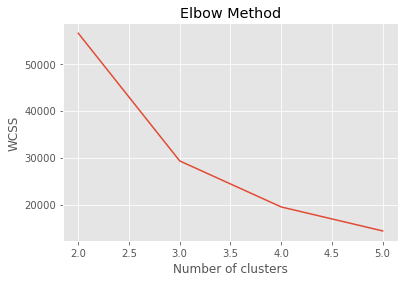

In [20]:
wcss=[None] * 4
i = 0
for k in range (2,6):
    clf = K_Means(k,0.001,300,0)
    clf.fit(X_array)
    wcss[i] = clf.display()
    i = i+1
print('wcss',wcss)

plt.plot(range(2, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### <span style='background : yellow' > **Q-5: Write a few lines about the interpretation of the best clusters obtained. Also write a few statements about how these clusters can be useful.**   </span>

    * K Means clustering algorithm calculates the sum of the square of the points and calculates the average distance. When the value of k is 1, the within-cluster sum of the square will be high. As the value of k increases, the within-cluster sum of square distance value will decrease.

    * From the elbow graph above, we can also conclude that when we use all the features also, we are getting lesser WCSS value with k = 5 when compared to k = 2,3,4. Hence, we are getting covergence / global optimum at k = 5.

    * Initial centroids are chosen randomly as the first k datapoints from the dataset which may cause final clusters to be somewhat different. 

    * This clustering would help in creating playlists or providing recommendations to users to suggest music based on their frequently liked songs/artists.